In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [2]:
df = pd.read_excel(r"C:\Users\ASUS\Downloads\project_1_datacleaning_&_EDA_resources\premiums.xlsx")
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [3]:
df.shape

(50000, 13)

In [4]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

### Data Cleaning

In [6]:
# Data Inconsistency -> some columns have spaces, others have _

In [7]:
df.columns = df.columns.str.replace(' ', '_').str.lower() #assign it back
df.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053


### Handling NA values

In [9]:
df.isnull().sum()

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [10]:
# in context of size of dataset, not that many

In [11]:
df.dropna(inplace = True)

In [12]:
df.duplicated().sum()
df.drop_duplicates(inplace = True)
df.duplicated().sum()


0

In [13]:
df.describe() #For numeric columns

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


In [14]:
# age 356 -> error
# number of dependents is a negative value -> error
# income_lakhs 930 lakhs (9.3 Cr) - > skewed distribution

### Univariate Analysis

In [16]:
df[df.number_of_dependants < 0].shape

(72, 13)

In [17]:
# 72 rows with less than 0 dependents

In [18]:
df[df.number_of_dependants < 0]['number_of_dependants'].unique()

array([-3, -1], dtype=int64)

In [19]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    49976.000000
mean         1.717284
std          1.491953
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

In [20]:
# Vizulaizing Outliers

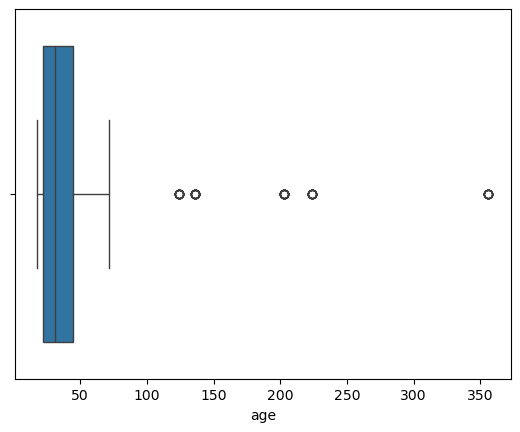

In [21]:
sns.boxplot(x = df['age'])
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49976 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    49976 non-null  int64 
 1   gender                 49976 non-null  object
 2   region                 49976 non-null  object
 3   marital_status         49976 non-null  object
 4   number_of_dependants   49976 non-null  int64 
 5   bmi_category           49976 non-null  object
 6   smoking_status         49976 non-null  object
 7   employment_status      49976 non-null  object
 8   income_level           49976 non-null  object
 9   income_lakhs           49976 non-null  int64 
 10  medical_history        49976 non-null  object
 11  insurance_plan         49976 non-null  object
 12  annual_premium_amount  49976 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.3+ MB


In [23]:
# All numeric ones are either float64 or int 64

In [24]:
df.select_dtypes(['float64', 'int64'])

,age,number_of_dependants,income_lakhs,annual_premium_amount
0,26,0,6,9053
1,29,2,6,16339
2,49,2,20,18164
3,30,3,77,20303
4,18,0,99,13365
...,...,...,...,...
49995,24,0,35,9111
49996,47,2,82,27076
49997,21,0,32,8564
49998,18,2,20,9490


In [25]:
df_numeric_columns = df.select_dtypes(['float64', 'int64']).columns
df_numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

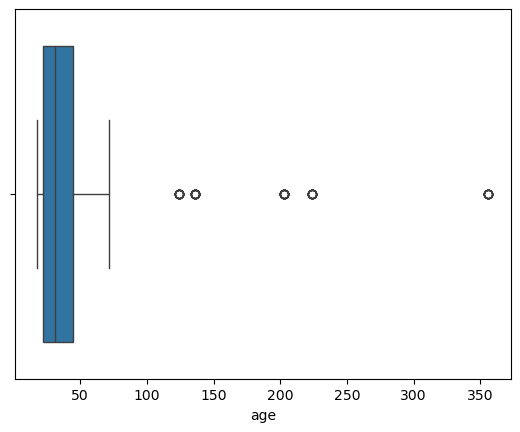

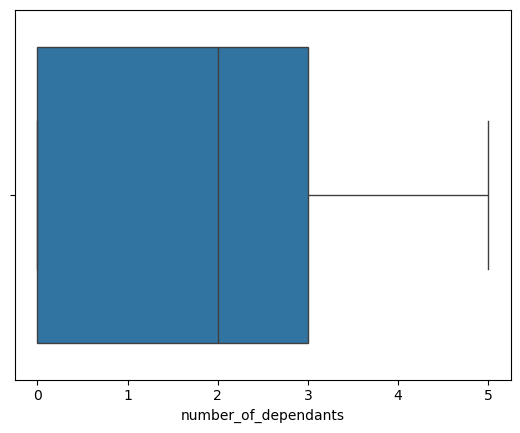

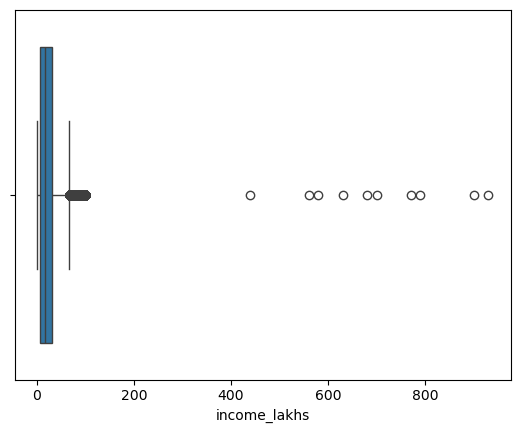

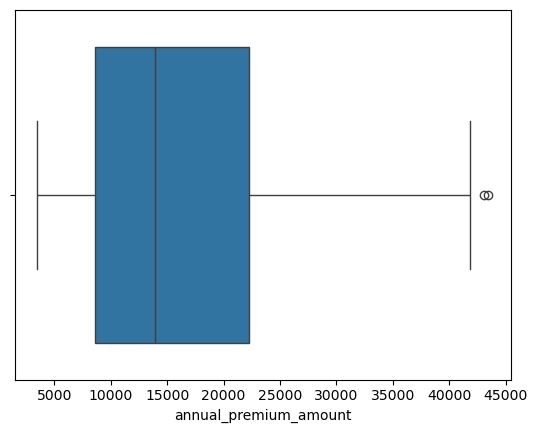

In [26]:
for col in df_numeric_columns:
    sns.boxplot(x = df[col])
    plt.show()
    

In [27]:
df[df.age>100]['age'].value_counts()

age
136    15
203    13
124    11
224    10
356     9
Name: count, dtype: int64

In [28]:
df[df.age>100]['age'].unique()

array([224, 124, 136, 203, 356], dtype=int64)

In [29]:
#we can drop them

In [30]:
df1 = df[df.age <=100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49918.000000,49918.000000,49918.000000,49918.000000
mean,34.401839,1.717617,23.025141,15766.589286
std,13.681600,1.492074,24.227912,8419.137327
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22272.000000
max,72.000000,5.000000,930.000000,43471.000000


<Axes: xlabel='income_lakhs', ylabel='Count'>

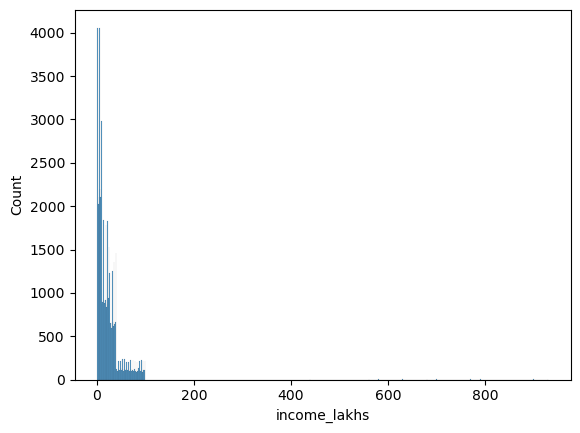

In [31]:
sns.histplot(df1.income_lakhs)

In [32]:
Q1,Q3 = df.income_lakhs.quantile([0.25,0.75])
Q1,Q3

(7.0, 31.0)

In [33]:
def get_iqr_bounds(col):
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return lower_bound, upper_bound

In [34]:
get_iqr_bounds(df1.income_lakhs)

(-29.0, 67.0)

In [35]:
quantile_threshold = df1.income_lakhs.quantile(0.999)
quantile_threshold

100.0

In [36]:
df1[df1.income_lakhs > quantile_threshold]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
2635,51,Male,Northwest,Married,4,Obesity,No Smoking,Self-Employed,> 40L,560,High blood pressure,Gold,30692
4220,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,> 40L,440,No Disease,Silver,10636
7775,35,Female,Northeast,Unmarried,0,Overweight,No Smoking,Salaried,> 40L,630,Diabetes,Gold,24010
9021,43,Male,Southeast,Married,3,Obesity,Regular,Salaried,> 40L,900,Diabetes & Thyroid,Gold,30848
10337,37,Female,Southeast,Married,3,Normal,No Smoking,Freelancer,> 40L,930,Diabetes,Silver,15945
10639,20,Female,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,> 40L,580,Thyroid,Silver,12888
11456,21,Female,Southwest,Unmarried,0,Obesity,No Smoking,Freelancer,> 40L,700,No Disease,Bronze,7424
15437,21,Female,Southeast,Unmarried,0,Normal,Occasional,Salaried,> 40L,790,No Disease,Silver,7586
35446,59,Male,Northwest,Married,2,Obesity,Occasional,Self-Employed,> 40L,770,Thyroid,Gold,31115
40970,48,Male,Northeast,Married,4,Obesity,No Smoking,Salaried,> 40L,680,No Disease,Gold,28926


In [37]:
df1[df1.income_lakhs > quantile_threshold].shape

(10, 13)

In [38]:
df2 =df1[ df1.income_lakhs <= quantile_threshold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49908.000000,49908.000000,49908.000000,49908.000000
mean,34.401579,1.717640,22.889897,15765.739641
std,13.681604,1.492032,22.170699,8418.674061
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22270.500000
max,72.000000,5.000000,100.000000,43471.000000


In [39]:
# not many outliers in annual_premium_amount -> let it be as is

In [40]:
# histogram -> right skewed, left skewed, the kind of distribution

<Axes: xlabel='income_lakhs', ylabel='Count'>

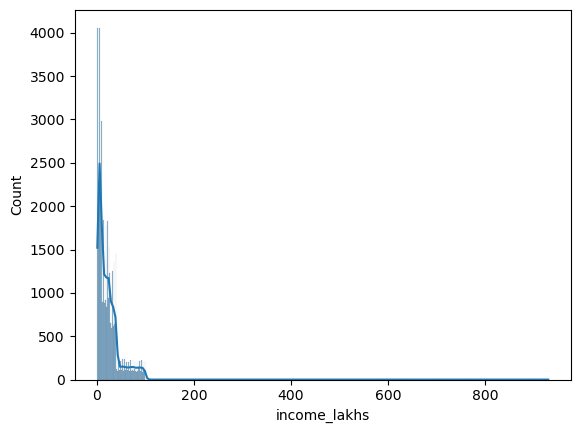

In [41]:
sns.histplot(df1['income_lakhs'],kde = True) # with outliers

<Axes: xlabel='income_lakhs', ylabel='Count'>

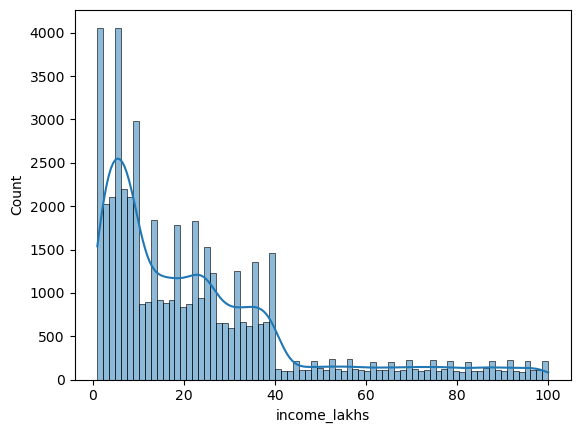

In [42]:
sns.histplot(df2['income_lakhs'],kde = True) # without outliers

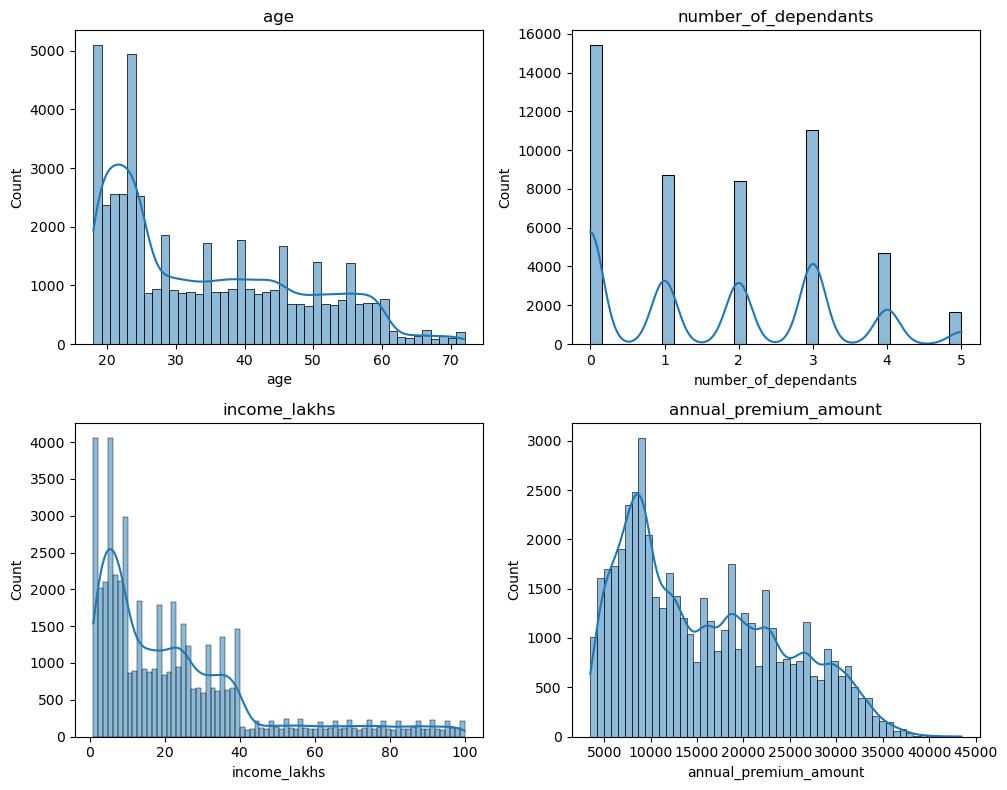

In [43]:
fig,axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

for i,col in enumerate(df_numeric_columns):
    ax = axs[i//2 , i%2] #Determines the position of the subplot in the grid
    sns.histplot(df2[col],kde = True,ax = ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

### Bivariate Analysis

<Axes: xlabel='age', ylabel='annual_premium_amount'>

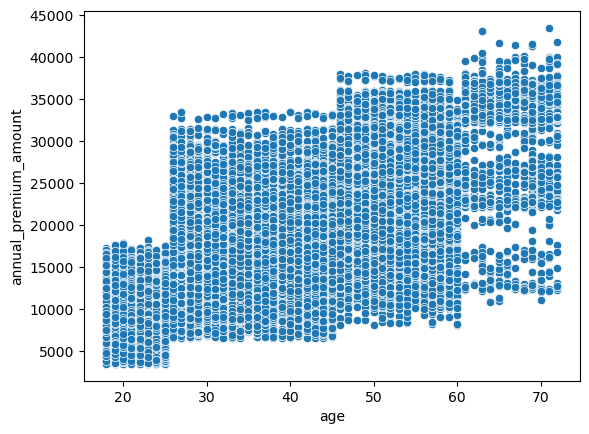

In [45]:
sns.scatterplot(df2, x = 'age', y ='annual_premium_amount')

In [46]:
#age increases, annual premium amount increases -> positive correlation/

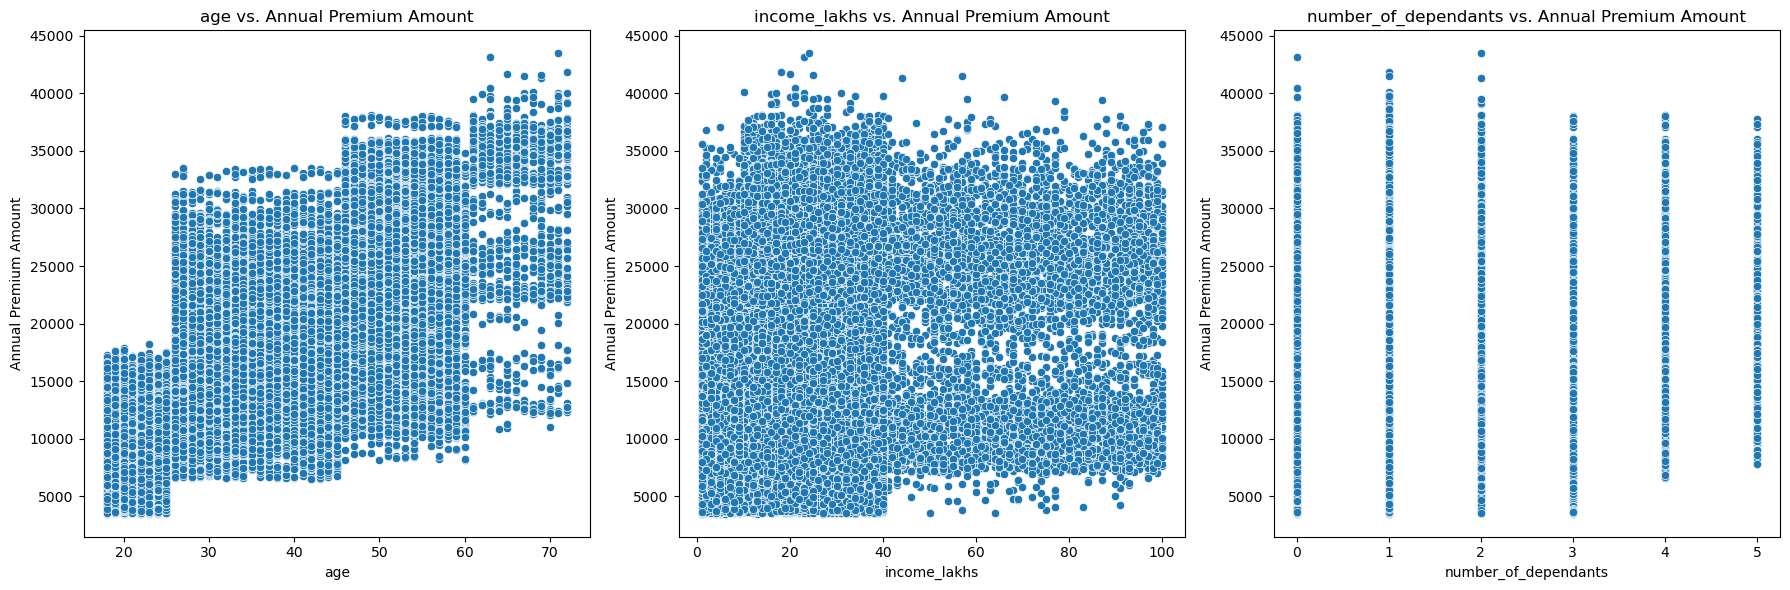

In [47]:
numeric_features = ['age' , 'income_lakhs', 'number_of_dependants']

fig,axes = plt.subplots(1, len(numeric_features), figsize = (18,6)) 

for ax, column in zip(axes, numeric_features):
    sns.scatterplot(x = df2[column], y =df2['annual_premium_amount'],ax = ax)
    ax.set_title(f'{column} vs. Annual Premium Amount')
    ax.set_xlabel(column)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout()
plt.show()

In [48]:
# no clear correlation between income_lakhs and number_of_dependants

In [49]:
categorical_df = df.select_dtypes('object')
categorical_df

,gender,region,marital_status,bmi_category,smoking_status,employment_status,income_level,medical_history,insurance_plan
0,Male,Northwest,Unmarried,Normal,No Smoking,Salaried,<10L,Diabetes,Bronze
1,Female,Southeast,Married,Obesity,Regular,Salaried,<10L,Diabetes,Bronze
2,Female,Northeast,Married,Normal,No Smoking,Self-Employed,10L - 25L,High blood pressure,Silver
3,Female,Southeast,Married,Normal,No Smoking,Salaried,> 40L,No Disease,Gold
4,Male,Northeast,Unmarried,Overweight,Regular,Self-Employed,> 40L,High blood pressure,Silver
...,...,...,...,...,...,...,...,...,...
49995,Female,Northwest,Unmarried,Underweight,No Smoking,Self-Employed,25L - 40L,No Disease,Bronze
49996,Female,Southeast,Married,Normal,No Smoking,Salaried,> 40L,Thyroid,Gold
49997,Male,Northwest,Unmarried,Normal,Regular,Freelancer,25L - 40L,No Disease,Bronze
49998,Male,Northwest,Unmarried,Normal,No Smoking,Salaried,10L - 25L,No Disease,Bronze


In [50]:
categorical_cols = df.select_dtypes('object').columns
categorical_cols

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [51]:
for col in categorical_cols:
    print(col, ":" , df2[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [52]:
# presence of non uniform values in smoking_status columns

In [53]:
df2['smoking_status'].replace({
    'Smoking=0' : 'No Smoking',
    'Does Not Smoke' : 'No Smoking',
    'Not Smoking' : 'No Smoking'
} , inplace = True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14800\3676593068.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({


In [54]:
df2['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [55]:
df2.gender.value_counts()

gender
Male      27431
Female    22477
Name: count, dtype: int64

In [56]:
pct_count = df2.gender.value_counts(normalize = True)
pct_count

gender
Male      0.549631
Female    0.450369
Name: proportion, dtype: float64

In [57]:
pct_count.index

Index(['Male', 'Female'], dtype='object', name='gender')

In [58]:
pct_count.values

array([0.54963132, 0.45036868])

<Axes: xlabel='gender'>

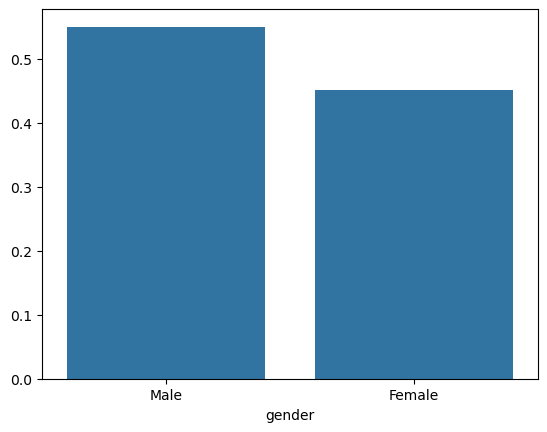

In [59]:
sns.barplot(x = pct_count.index, y = pct_count.values)

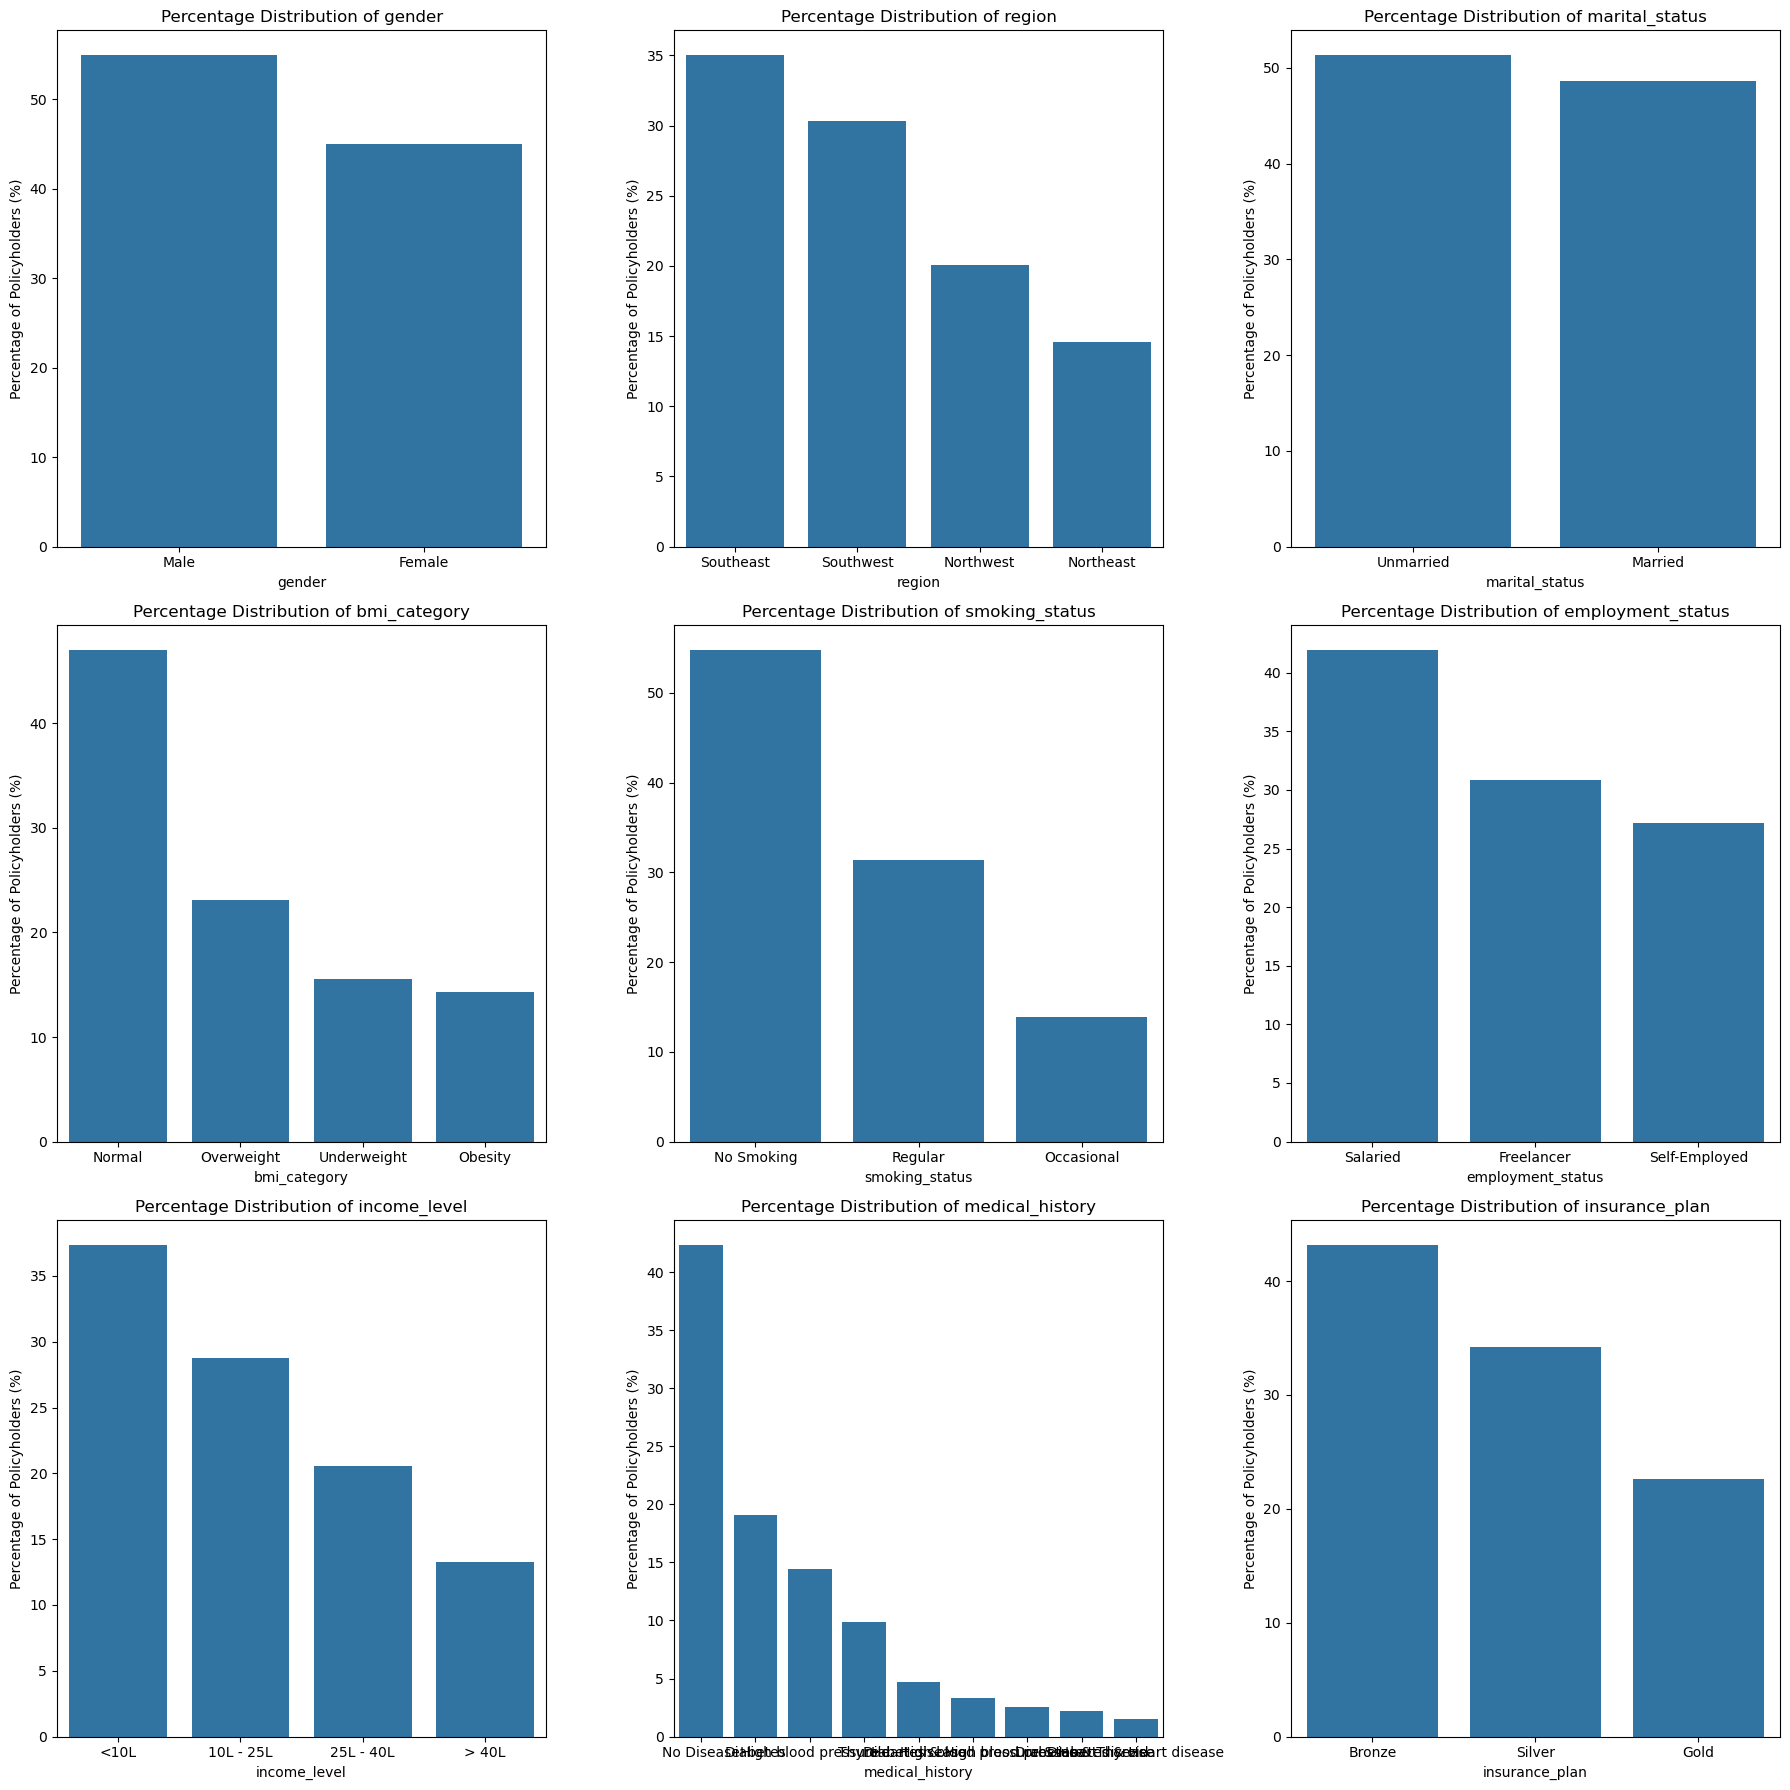

In [60]:
fig,axes = plt.subplots(3,3,figsize = (18,18))
axes = axes.flatten() # flatten the 2D array of axes into 1D for easier iteration

for ax,column in zip (axes, categorical_cols):
    #calc the percentage distribution of each category
    category_counts = df2[column].value_counts(normalize = True) * 100

    # Plotting the distribution using barplot
    sns.barplot(x=category_counts.index , y = category_counts.values, ax = ax)
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel(f'Percentage of Policyholders (%)')
    ax.set_xlabel(column) 

plt.tight_layout()
plt.show()

In [61]:
crosstab = pd.crosstab(df2['income_level'] , df2['insurance_plan'])
crosstab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,5307,3880,5182
25L - 40L,3683,2840,3750
<10L,12226,931,5486
> 40L,329,3653,2641


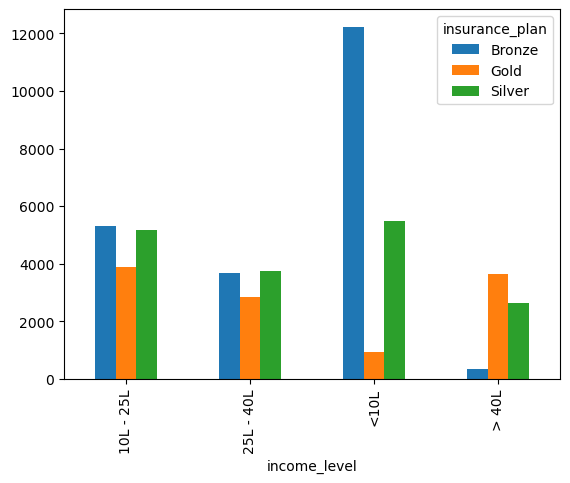

In [62]:
crosstab.plot(kind = "bar")
plt.show()

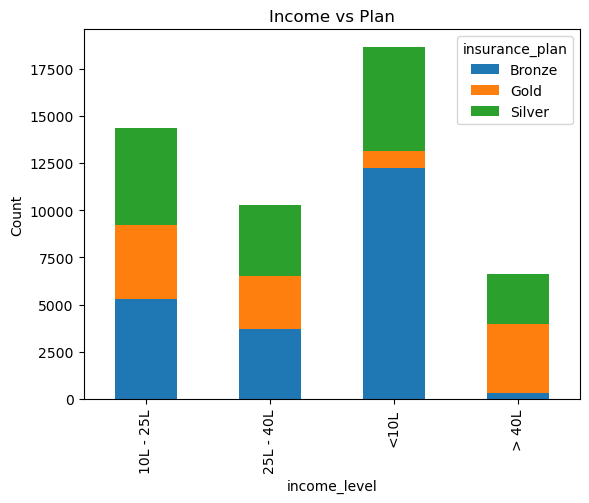

In [63]:
crosstab.plot(kind = "bar",stacked = True)
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='insurance_plan', ylabel='income_level'>

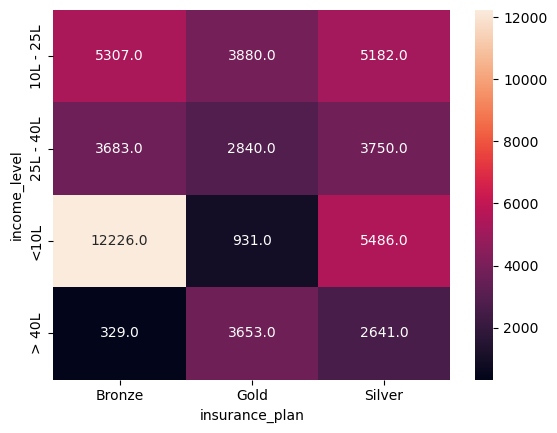

In [64]:
sns.heatmap(crosstab, annot = True, fmt = '.1f')

In [126]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339


In [128]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [130]:
# higher number of pre-existing diseases -> higher premium

In [132]:
risk_score = {
    "diabetes" : 6,
    "heart disease": 8,
    "high blood pressure" : 6,
    "thyroid" : 5,
    "no disease" : 0,
    "none" : 0
}

df2['medical_history'].str.split(" & ")

0                   [Diabetes]
1                   [Diabetes]
2        [High blood pressure]
3                 [No Disease]
4        [High blood pressure]
                 ...          
49995             [No Disease]
49996                [Thyroid]
49997             [No Disease]
49998             [No Disease]
49999               [Diabetes]
Name: medical_history, Length: 49908, dtype: object

In [134]:
df2['medical_history'].str.split(" & ", expand = True)

,0,1
0,Diabetes,None
1,Diabetes,None
2,High blood pressure,None
3,No Disease,None
4,High blood pressure,None
...,...,...
49995,No Disease,None
49996,Thyroid,None
49997,No Disease,None
49998,No Disease,None


In [140]:
df2['medical_history'].str.split(" & ", expand = True).apply(lambda x: x.str.lower()).sample(10)

,0,1
43232,heart disease,None
19723,no disease,None
5996,diabetes,None
28519,heart disease,None
12310,no disease,None
3266,no disease,None
45045,high blood pressure,heart disease
12025,high blood pressure,None
12343,no disease,None
12897,diabetes,None


In [144]:
df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ",expand = True).apply(lambda x : x.str.lower())
df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,None
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,None
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,None


In [154]:
df2['disease1'].fillna('none',inplace = True)
df2['disease2'].fillna('none',inplace = True)
df2['total_risk_score'] = 0 

for disease in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_score)

max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14800\914496287.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none',inplace = True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14800\914496287.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,none,0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,6,0.428571


In [156]:
df2.insurance_plan.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [158]:
# ordinal (order) category -> label encoding

In [160]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze' : 1, 'Silver' : 2, 'Gold' : 3})
df2.insurance_plan.unique()

array([1, 2, 3], dtype=int64)

In [162]:
df2['income_level'].unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [164]:
df2['income_level'] = df2['income_level'].map({'<10L': 1, '10L - 25L': 2, '25L - 40L' : 3, '> 40L' : 4})
df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,1,6,Diabetes,1,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,1,6,Diabetes,1,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,2,20,High blood pressure,2,18164,high blood pressure,none,6,0.428571


In [168]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df3 = pd.get_dummies(df2, columns = nominal_cols, drop_first = True, dtype = int)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,diabetes,none,6,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,diabetes,none,6,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,high blood pressure,none,6,...,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,No Disease,3,20303,no disease,none,0,...,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,High blood pressure,2,13365,high blood pressure,none,6,...,0,0,1,0,1,0,0,1,0,1


In [170]:
df4 = df3.drop(['medical_history', 'disease1', 'disease2', 'total_risk_score'], axis = 1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,2,13365,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


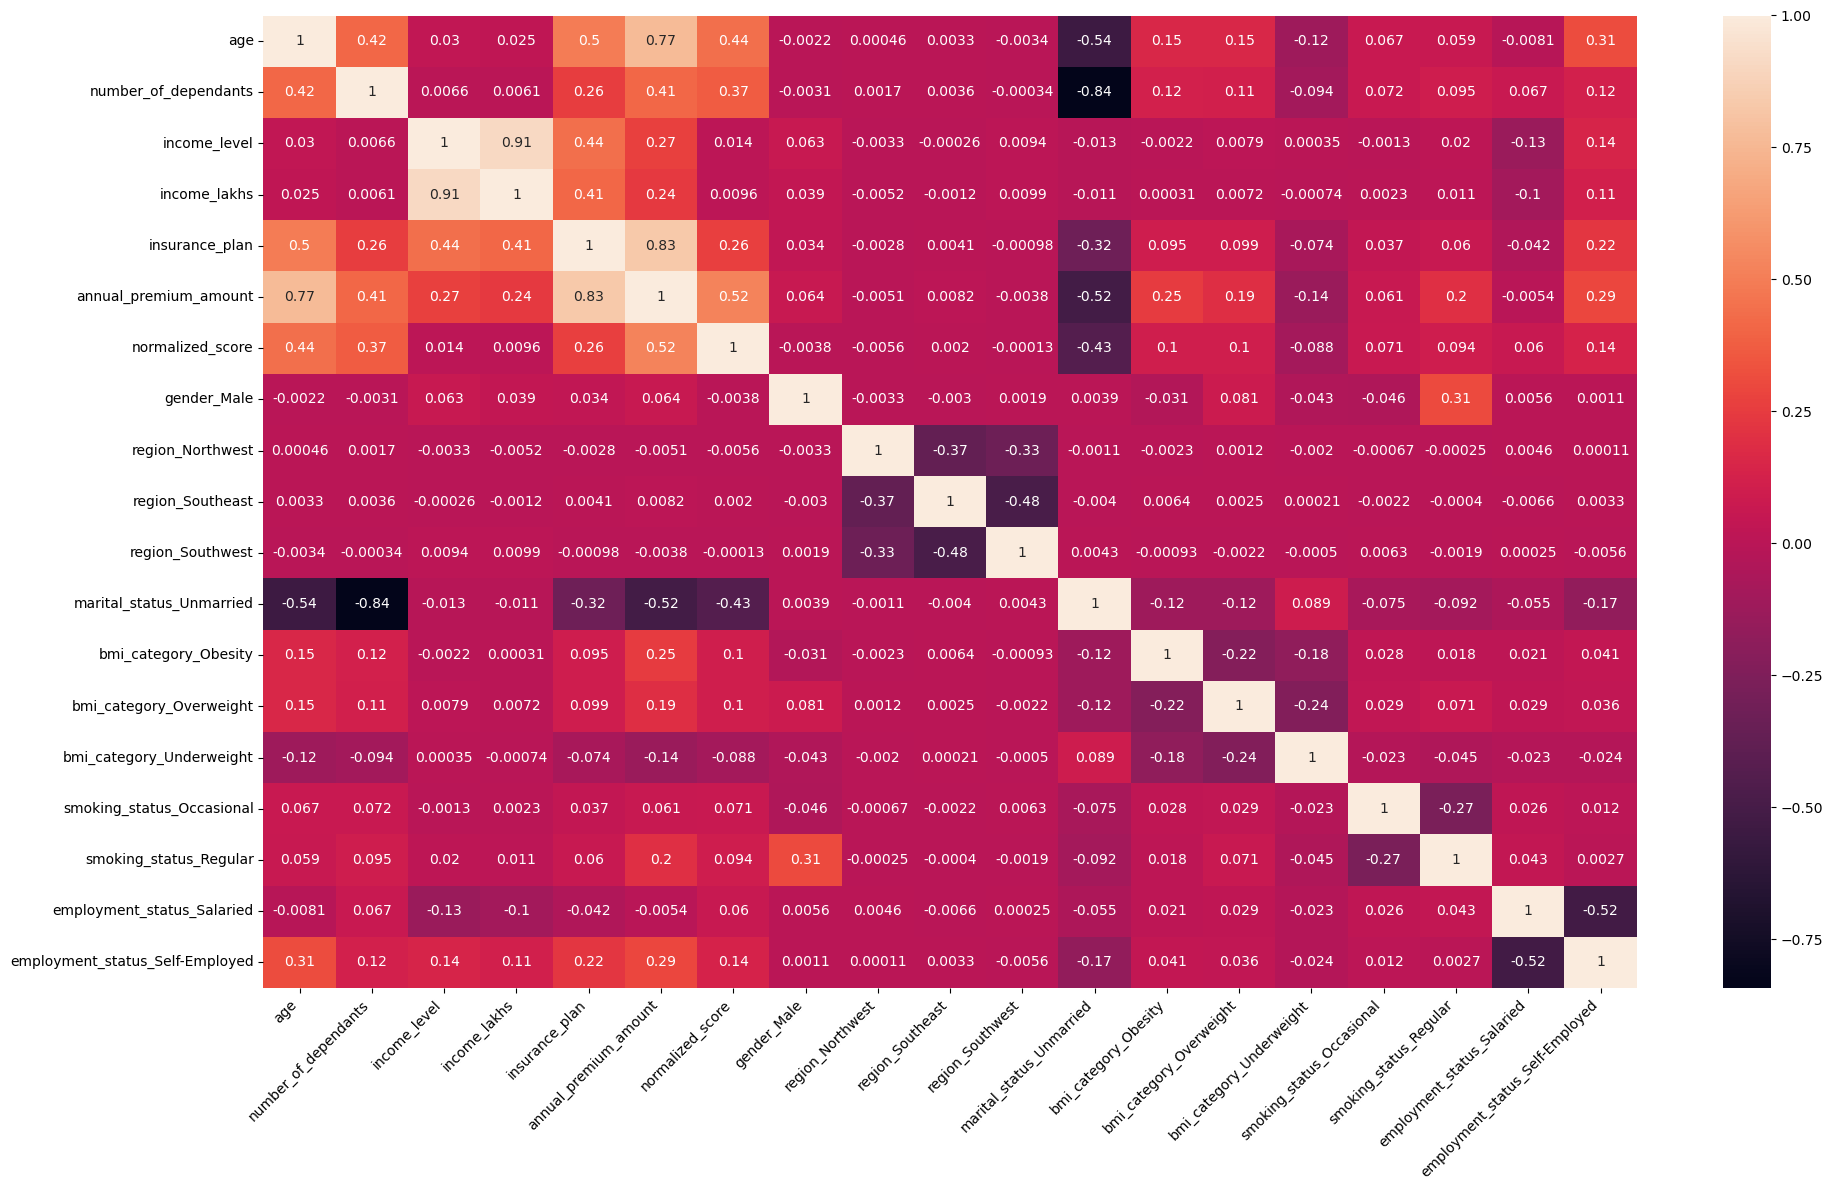

In [172]:
cm = df4.corr()

plt.figure(figsize = (20,12))
sns.heatmap(cm, annot = True)
plt.xticks(rotation = 45, ha ='right')
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

In [174]:
df4.head(2)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0


In [176]:
X = df4.drop('annual_premium_amount', axis = 'columns')
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['age','number_of_dependants','income_level','income_lakhs','insurance_plan',]

scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.head()


,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.148148,0.0,0.000000,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.203704,0.4,0.000000,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.574074,0.4,0.333333,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.222222,0.6,1.000000,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.000000,0.0,1.000000,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


In [178]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Variable'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [180]:
calculate_vif(X)

,Variable,VIF
0,age,4.567634
1,number_of_dependants,4.534650
2,income_level,12.450675
3,income_lakhs,11.183367
4,insurance_plan,3.584752
5,normalized_score,2.687610
6,gender_Male,2.421496
7,region_Northwest,2.102556
8,region_Southeast,2.922414
9,region_Southwest,2.670666


In [182]:
#income level and income lakhs vif higher than 10 - they are extremely correlated.

In [184]:
calculate_vif(X.drop('income_level', axis = 'columns'))

,Variable,VIF
0,age,4.545825
1,number_of_dependants,4.526598
2,income_lakhs,2.480563
3,insurance_plan,3.445682
4,normalized_score,2.687326
5,gender_Male,2.409980
6,region_Northwest,2.100789
7,region_Southeast,2.919775
8,region_Southwest,2.668314
9,marital_status_Unmarried,3.393718


In [186]:
X_reduced = X.drop('income_level', axis = 'columns')
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.148148,0.0,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.203704,0.4,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.574074,0.4,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.222222,0.6,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.000000,0.0,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


### Model Training

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced,y, test_size = 0.3, random_state = 10)

In [199]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

train_score = model_lr.score(X_train,y_train)
test_score = model_lr.score(X_test,y_test)

train_score,test_score

(0.9282143576916762, 0.9280547230217837)

In [230]:
y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test,y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Linear Regression ==> MSE:  5165611.913027984 RMSE:  2272.7982561212916


In [201]:
# both same, sometimes if train score is greater than test score than it is overfitting

In [209]:
X_test.head(1)

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
3598,0.481481,0.4,0.343434,0.5,0.428571,1,0,1,0,1,0,1,0,0,1,1,0


In [203]:
model_lr.coef_

array([11160.92646188,  -676.44399066,  -514.22981577, 12557.01293645,
        4810.35770228,   168.64666183,   -35.7192924 ,    39.96512973,
         -24.65292857,  -935.76061134,  3387.91145477,  1599.36226775,
         391.1713038 ,   735.91227798,  2234.8047119 ,   155.9846743 ,
         415.90397305])

In [205]:
model_lr.intercept_

4824.300272127093

In [211]:
X_test.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'normalized_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

In [218]:
feature_importances = model_lr.coef_ #other models have a feature importance function. LR -> coefficients

coef_df = pd.DataFrame(feature_importances,index = X_test.columns, columns = ['Coefficients'])
coef_df = coef_df.sort_values(by = 'Coefficients' , ascending = True)
coef_df

,Coefficients
marital_status_Unmarried,-935.760611
number_of_dependants,-676.443991
income_lakhs,-514.229816
region_Northwest,-35.719292
region_Southwest,-24.652929
region_Southeast,39.965130
employment_status_Salaried,155.984674
gender_Male,168.646662
bmi_category_Underweight,391.171304
employment_status_Self-Employed,415.903973


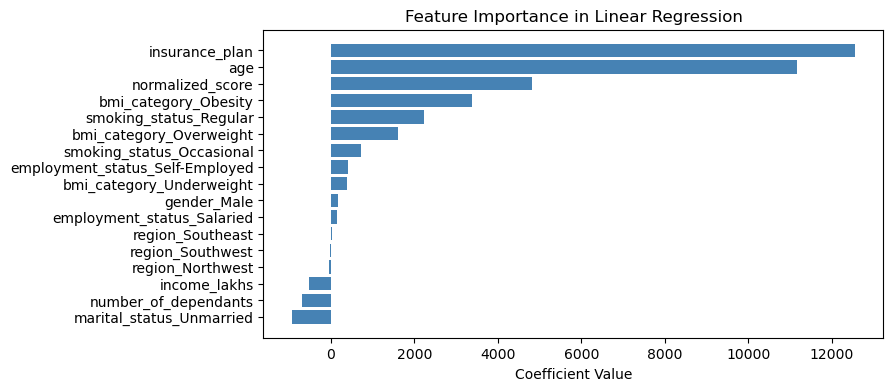

In [220]:
plt.figure(figsize = (8,4))
plt.barh(coef_df.index, coef_df['Coefficients'], color = 'steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

In [222]:
model_rg = Ridge()
model_rg.fit(X_train,y_train)
train_score = model_rg.score(X_train,y_train)
test_Score = model_rg.score(X_test,y_test)
train_score,test_score

(0.9282143198366275, 0.9280547230217837)

In [224]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train,y_train)
train_score = model_xgb.score(X_train,y_train)
test_Score = model_xgb.score(X_test,y_test)
train_score,test_score

(0.9860964164832711, 0.9280547230217837)

In [228]:
y_pred = model_xgb.predict(X_test)

mse_lr = mean_squared_error(y_test,y_pred)
rmse_lr = np.sqrt(mse_lr)
print("XGBoost Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

XGBoost Regression ==> MSE:  1367525.6922808294 RMSE:  1169.412541527082


In [232]:
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators' : [20,40,50],
    'learning_rate' : [0.01,0.1,0.2],
    'max_depth' : [3,4,5]
}

random_search = RandomizedSearchCV(model_xgb,param_grid, n_iter = 10, cv = 3, scoring = 'r2', random_state = 42)
random_search.fit(X_train, y_train)
random_search.best_score_

0.9809474553641963

In [234]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [236]:
best_model = random_search.best_estimator_

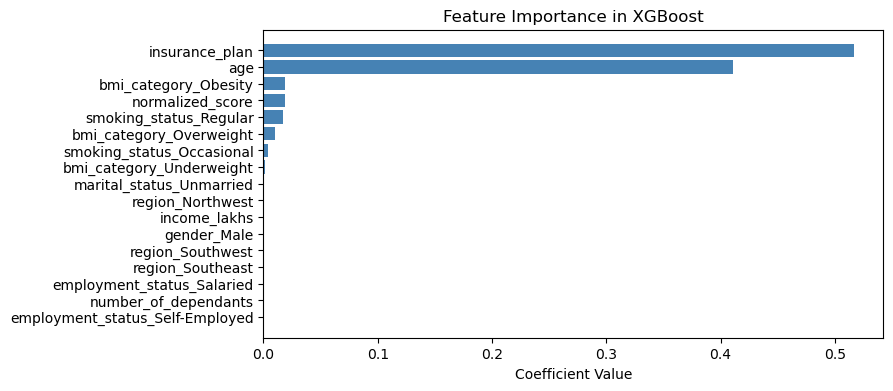

In [238]:
feature_importances = best_model.feature_importances_

coef_df = pd.DataFrame(feature_importances,index = X_test.columns, columns = ['Coefficients'])
coef_df = coef_df.sort_values(by = 'Coefficients' , ascending = True)

plt.figure(figsize = (8,4))
plt.barh(coef_df.index, coef_df['Coefficients'], color = 'steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost')
plt.show()

In [240]:
# AS XGBoost is tree-based, interpretation of feature importance is not as straightforward as Linear Regression

### Error Analysis

In [243]:
# Can't rely only on R2 score to deploy the model. Need to find the margin of error in each of the sample

In [245]:
y_pred = best_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = (residuals*100)/y_test

results_df = pd.DataFrame ({
    'actual' : y_test,
    'predicted' : y_pred,
    'Delta' : residuals,
    'Delta_pct' : residuals_pct
})
results_df.head()

,actual,predicted,Delta,Delta_pct
3598,20554,20334.953125,-219.046875,-1.065714
35794,29647,29378.779297,-268.220703,-0.904714
43608,20560,20618.185547,58.185547,0.283004
42730,5018,7352.829590,2334.829590,46.529087
18936,8929,8203.291992,-725.708008,-8.127540


<Axes: xlabel='Delta_pct', ylabel='Count'>

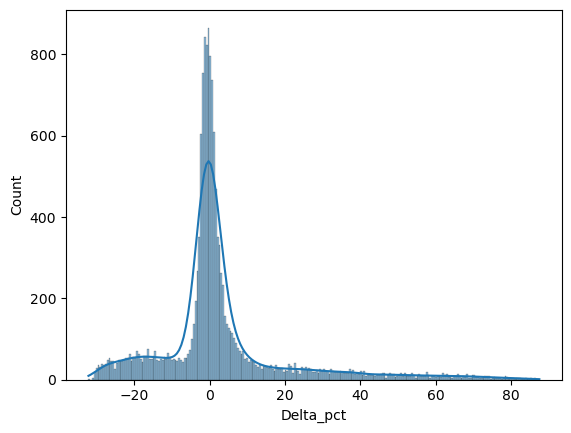

In [249]:
sns.histplot(results_df['Delta_pct'], kde = True)

In [251]:
# how many records with more than 10% error

In [261]:
extreme_threshold = 10

extreme_results_df = results_df[np.abs(results_df.Delta_pct) > extreme_threshold]
extreme_results_df.shape

(4487, 4)

In [265]:
results_df.shape

(14973, 4)

In [269]:
extreme_error_pct = extreme_results_df.shape[0] * 100 / results_df.shape[0]
extreme_error_pct

29.967274427302478

In [273]:
results_df[np.abs(results_df.Delta_pct) > 50].sort_values('Delta_pct',ascending = False)

,actual,predicted,Delta,Delta_pct
36269,3501,6565.852051,3064.852051,87.542189
48801,3516,6565.852051,3049.852051,86.742095
42342,3521,6565.852051,3044.852051,86.476911
18564,3523,6565.852051,3042.852051,86.371049
7988,3527,6565.852051,3038.852051,86.159684
...,...,...,...,...
32671,4656,6994.980957,2338.980957,50.235845
14798,4371,6565.852051,2194.852051,50.213957
13736,4371,6565.852051,2194.852051,50.213957
10107,4710,7073.240723,2363.240723,50.174962


In [275]:
extreme_results_df.index

Index([42730, 20029,  4294, 44419,  6707, 11728, 15740, 35065,  9654, 22679,
       ...
       36158, 30386, 21184, 45020,  8249,  8767, 25179, 21592, 49274, 27977],
      dtype='int64', length=4487)

In [277]:
#high margin errors in X_test

In [281]:
extreme_error_df = X_test.loc[extreme_results_df.index]
extreme_error_df

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
42730,0.092593,0.2,0.131313,0.0,0.428571,1,0,0,0,1,0,1,0,0,0,0,0
20029,0.018519,0.2,0.030303,0.0,0.000000,0,1,0,0,1,0,0,1,0,0,1,0
4294,0.000000,0.2,0.020202,0.0,0.000000,1,0,0,1,1,0,1,0,0,0,0,0
44419,0.055556,0.0,0.242424,0.0,0.000000,0,0,0,0,1,0,0,1,0,0,0,0
6707,0.111111,0.2,0.070707,0.5,0.000000,1,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8767,0.018519,0.2,0.070707,0.0,0.000000,0,0,1,0,1,0,0,0,0,0,0,0
25179,0.129630,0.0,0.111111,0.0,0.000000,1,0,0,0,1,0,0,0,0,1,0,0
21592,0.055556,0.0,0.060606,0.5,0.000000,1,0,0,0,1,0,0,0,0,1,0,0
49274,0.055556,0.2,0.070707,0.0,0.000000,0,0,0,0,1,0,0,0,1,0,0,0


In [283]:
# is error rate highre in specific income group

<Axes: xlabel='income_lakhs', ylabel='Count'>

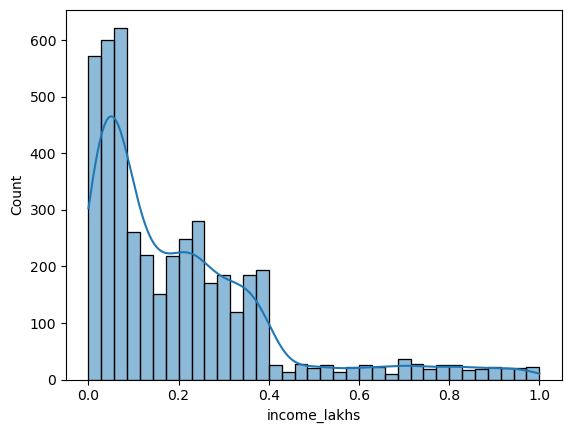

In [285]:
sns.histplot(extreme_error_df.income_lakhs, kde = True)

In [ ]:
# No insight need some base case to compare it against

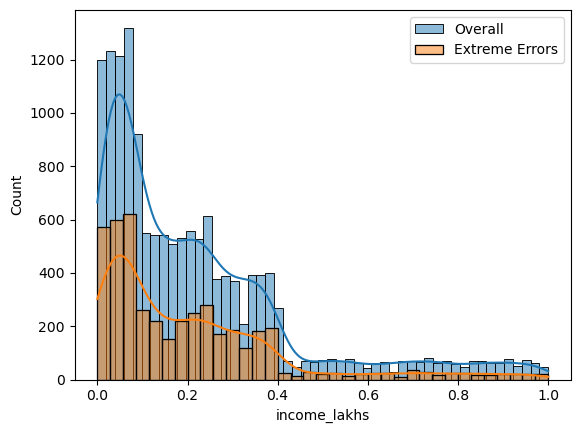

In [289]:
sns.histplot(X_test.income_lakhs, label = "Overall" , kde = True)
sns.histplot(extreme_error_df.income_lakhs,label = "Extreme Errors", kde = True)
plt.legend()
plt.show()

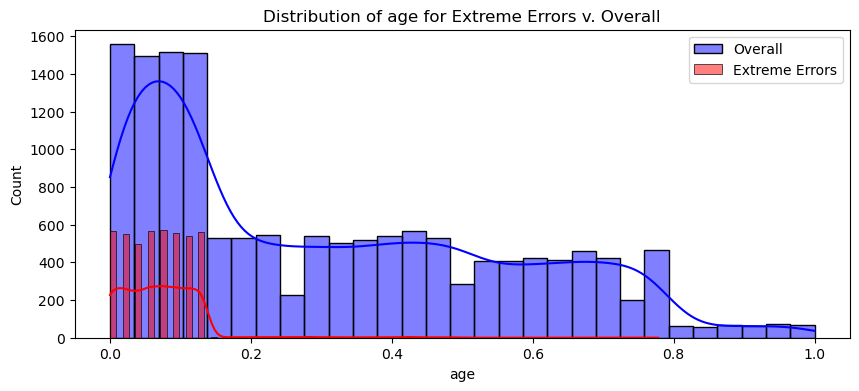

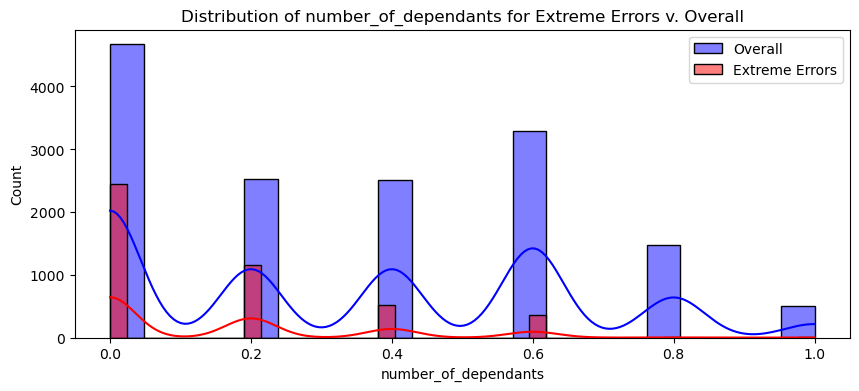

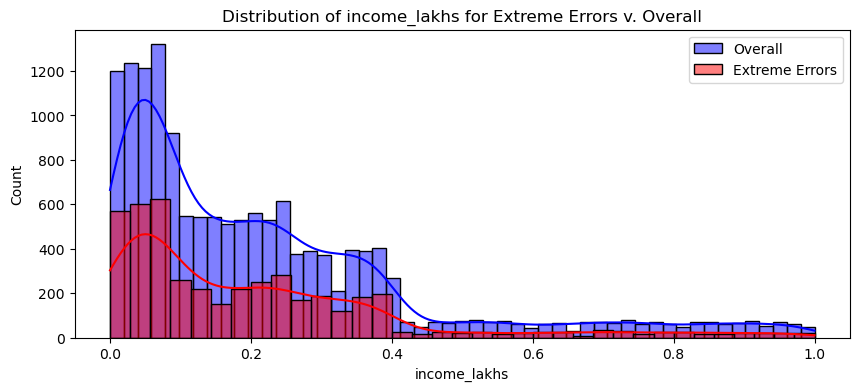

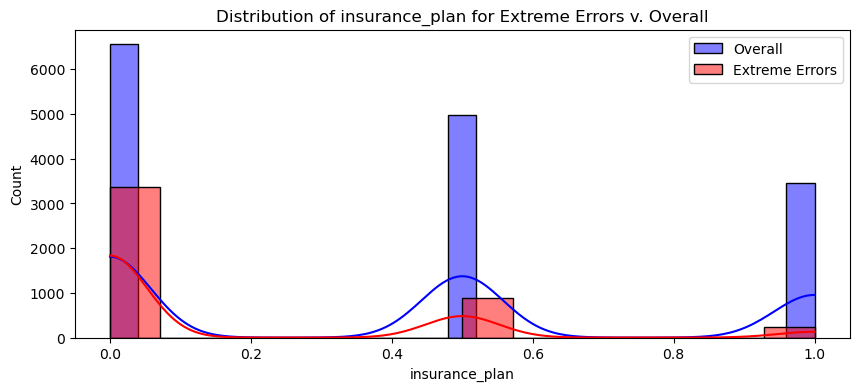

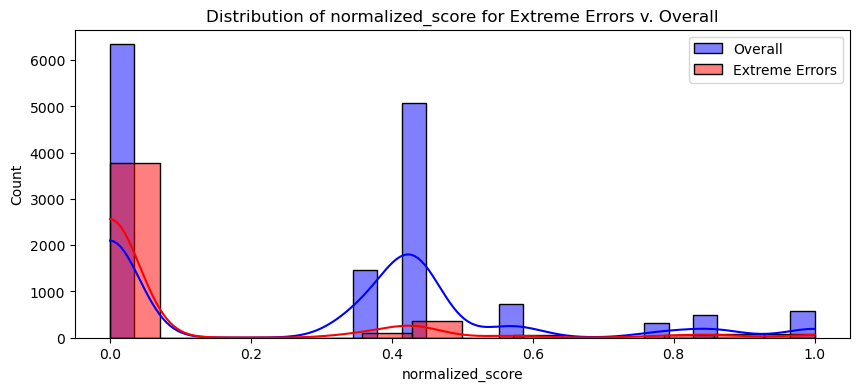

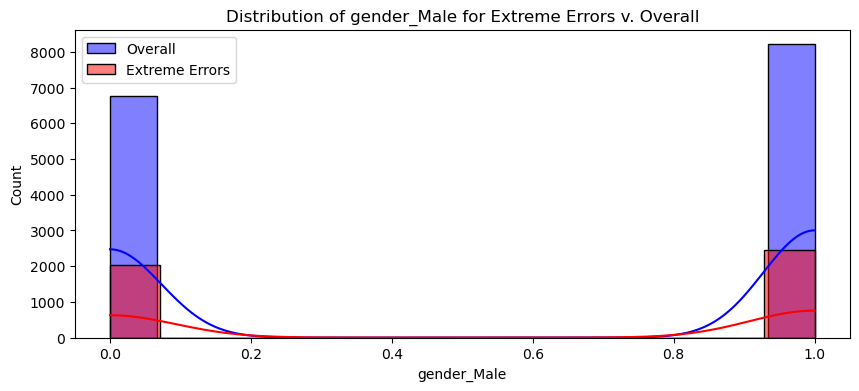

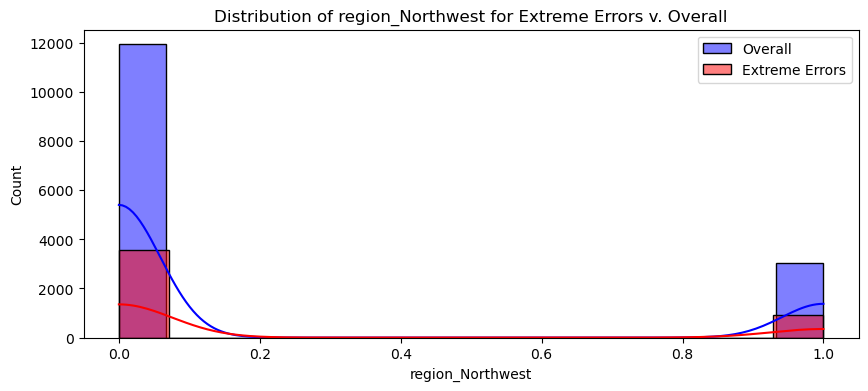

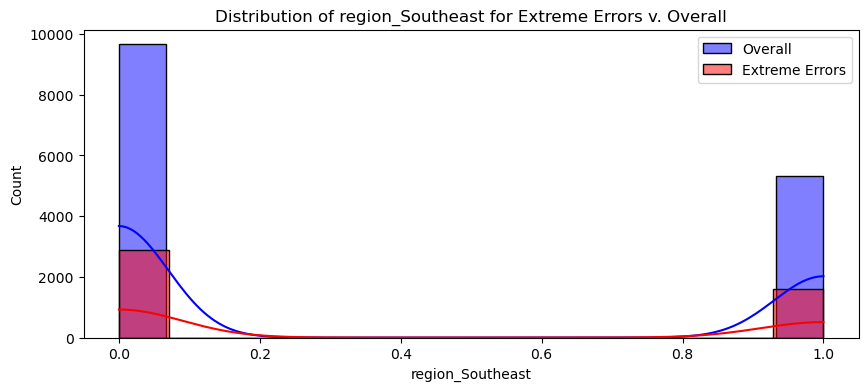

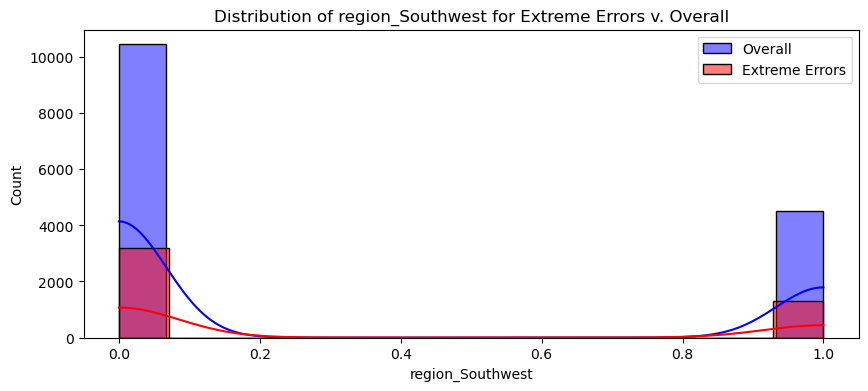

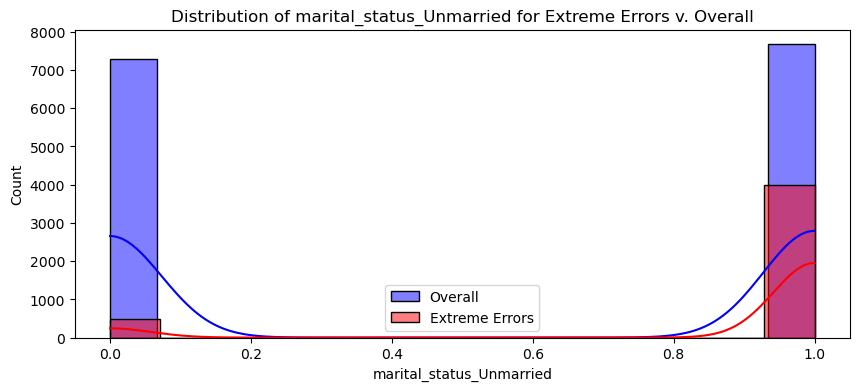

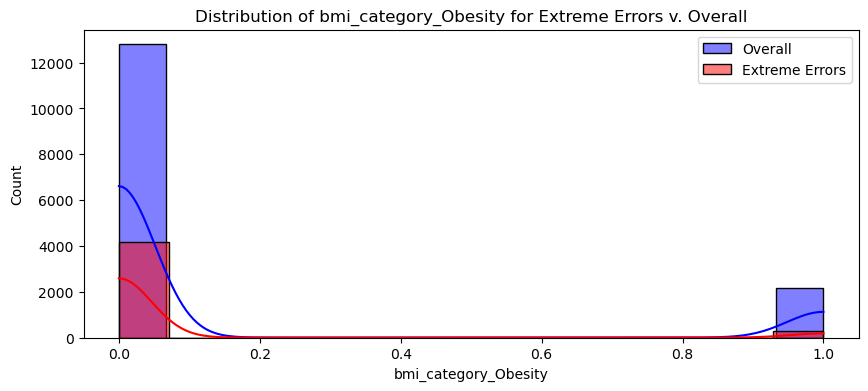

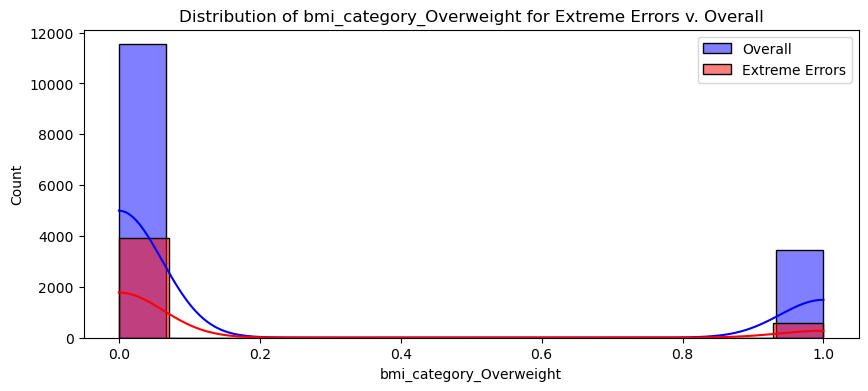

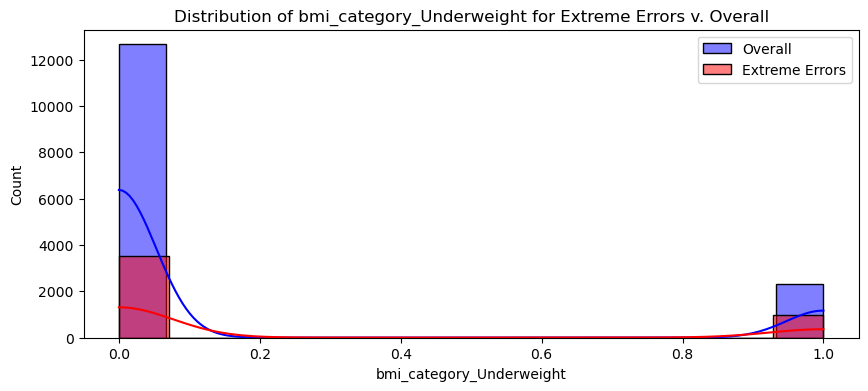

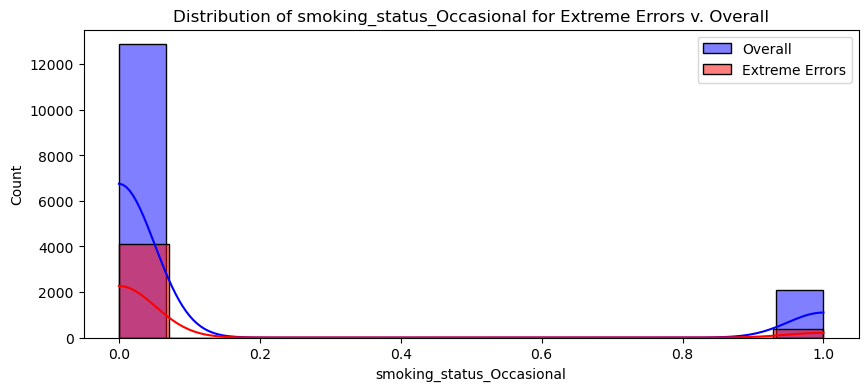

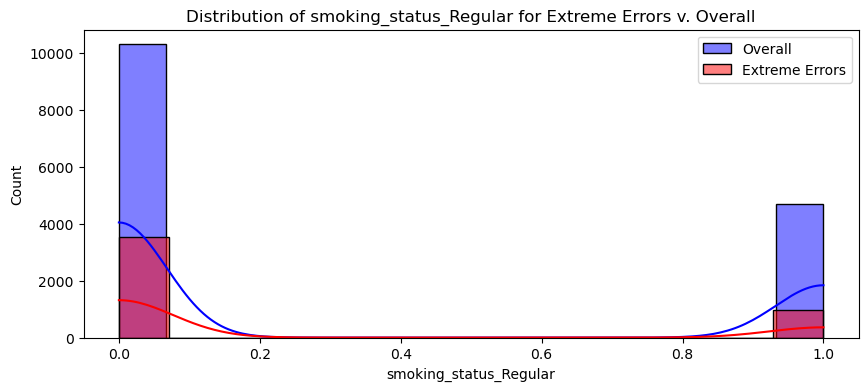

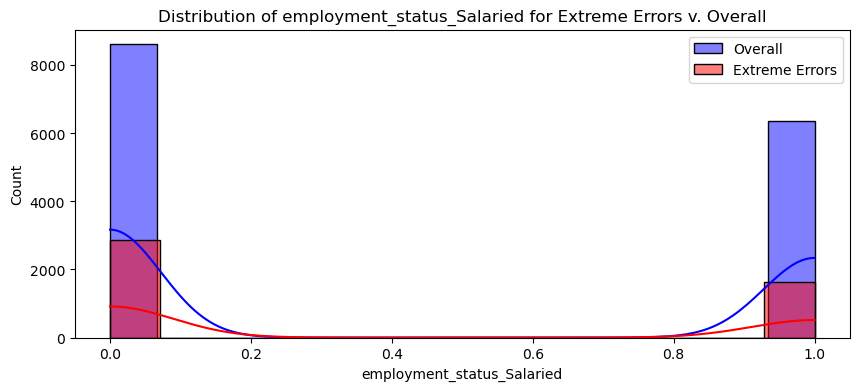

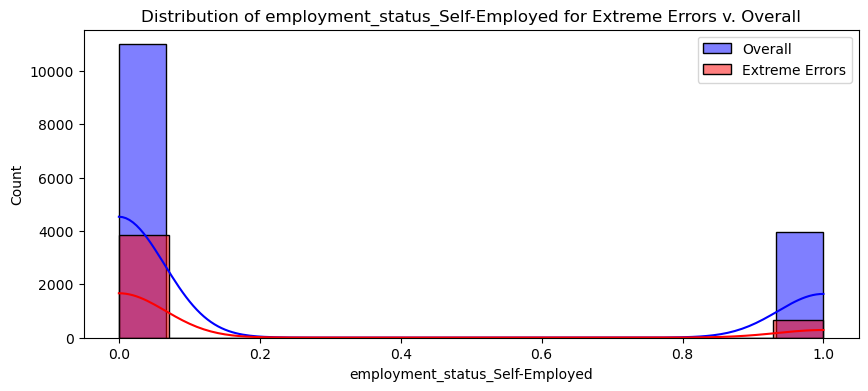

In [297]:
for feature in X_test.columns:
    plt.figure(figsize = (10,4))
    sns.histplot(X_test[feature],color = 'blue', label = "Overall" , alpha = 0.5,kde = True)
    sns.histplot(extreme_error_df[feature], color = 'red', label = "Extreme Errors", kde = True)
    plt.legend()
    plt.title(f'Distribution of {feature} for Extreme Errors v. Overall')
    plt.show()

frequencies in X test are similar to frequencies of Extreme Erros

AGE COLUMN - ERRORS ARE HIGH IN LOWER AGE GROUP

<Axes: xlabel='age', ylabel='Count'>

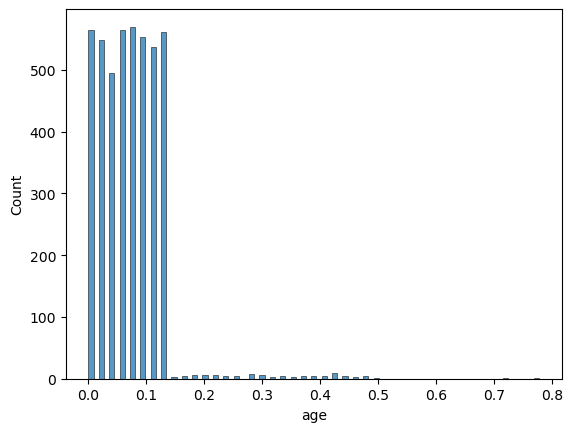

In [305]:
sns.histplot(extreme_error_df.age)

In [309]:
extreme_error_df.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'normalized_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

In [313]:
extreme_error_df['income_level'] = -1 #don't necessarily need the column but need for the object to work

In [315]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_error_df[cols_to_scale])
df_reversed

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,23.0,1.0,-2.0,14.0,1.0
1,19.0,1.0,-2.0,4.0,1.0
2,18.0,1.0,-2.0,3.0,1.0
3,21.0,0.0,-2.0,25.0,1.0
4,24.0,1.0,-2.0,8.0,2.0
...,...,...,...,...,...
4482,19.0,1.0,-2.0,8.0,1.0
4483,25.0,0.0,-2.0,12.0,1.0
4484,21.0,0.0,-2.0,7.0,2.0
4485,21.0,1.0,-2.0,8.0,1.0


<Axes: xlabel='age', ylabel='Count'>

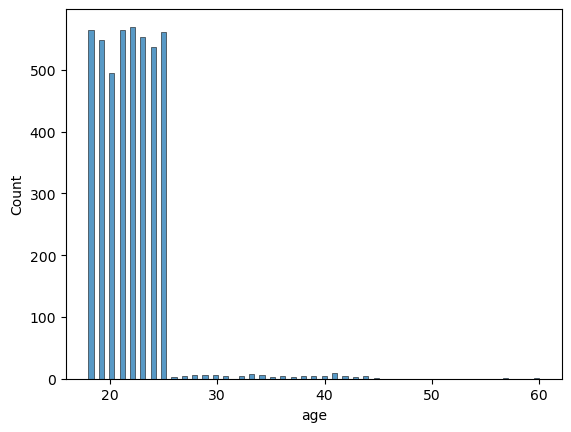

In [317]:
sns.histplot(df_reversed['age'])

In [319]:
df_reversed['age'].describe()

count    4487.000000
mean       21.804992
std         3.172355
min        18.000000
25%        20.000000
50%        22.000000
75%        24.000000
max        60.000000
Name: age, dtype: float64

In [321]:
df_reversed['age'].quantile(0.97)

25.0

97% of extreme error ages' are less than 25